# 银行认购预测

# 数据探索

In [1]:
import numpy as np
import pandas as pd
import sklearn
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)
path=r'C:/Users/LCP/Desktop/统计学习实现/练习/data/银行认购预测/'

In [2]:
def load_data():
    Train_DF=pd.read_csv(path+'train.csv')
    Test_DF=pd.read_csv(path+'test.csv')
    return Train_DF,Test_DF

train_df,test_df=load_data()

In [3]:
train_df.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,4621,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,mon,4715,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,171,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,359,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,tue,3178,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no


In [4]:
#ID属性无意义，删去
train_df=train_df.drop(columns=['id'])
test_df=test_df.drop(columns=['id'])

In [5]:
#把标签类别改为0与1的描述
train_df['subscribe']=train_df['subscribe'].map({'no':0,'yes':1})

In [6]:
#区分定量特征与定性特征
object_feature=train_df.select_dtypes(include='object').columns.tolist()
num_feature=train_df.select_dtypes(exclude='object').columns.tolist()
num_feature.remove('subscribe')

# 特征工程

## 定性特征编码分析

In [7]:
#查看定性特征
train_df[object_feature].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,failure
1,services,married,high.school,unknown,yes,no,cellular,may,mon,nonexistent
2,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,failure
3,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,nonexistent
4,admin.,single,university.degree,no,no,no,cellular,nov,tue,success


In [8]:
#定性特征进行量化
meanencoder=[]
labelencoder=[]
for item in object_feature:
    if train_df[item].nunique()>=10 and item!='month':
        meanencoder.append(item)
        continue
    labelencoder.append(item)

In [9]:
#对月份和星期进行编码
train_df['month']=train_df['month'].map({'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
test_df['month']=test_df['month'].map({'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

train_df['day_of_week']=train_df['day_of_week'].map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5})
test_df['day_of_week']=test_df['day_of_week'].map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5})
labelencoder.remove('day_of_week')

In [10]:
#其余特征使用label Encoding方法进行编码
from sklearn.preprocessing import LabelEncoder
for item in labelencoder:
    temp_coder=LabelEncoder()
    train_df[item]=temp_coder.fit_transform(train_df[item])
    test_df[item]=temp_coder.transform(test_df[item])

In [11]:
#job类型数据采用mean Encoding的方法进行编码
from category_encoders.target_encoder import TargetEncoder
coder=TargetEncoder(cols=meanencoder)
train_df[meanencoder]=coder.fit_transform(train_df[meanencoder],train_df['subscribe'])
test_df[meanencoder]=coder.transform(test_df[meanencoder])

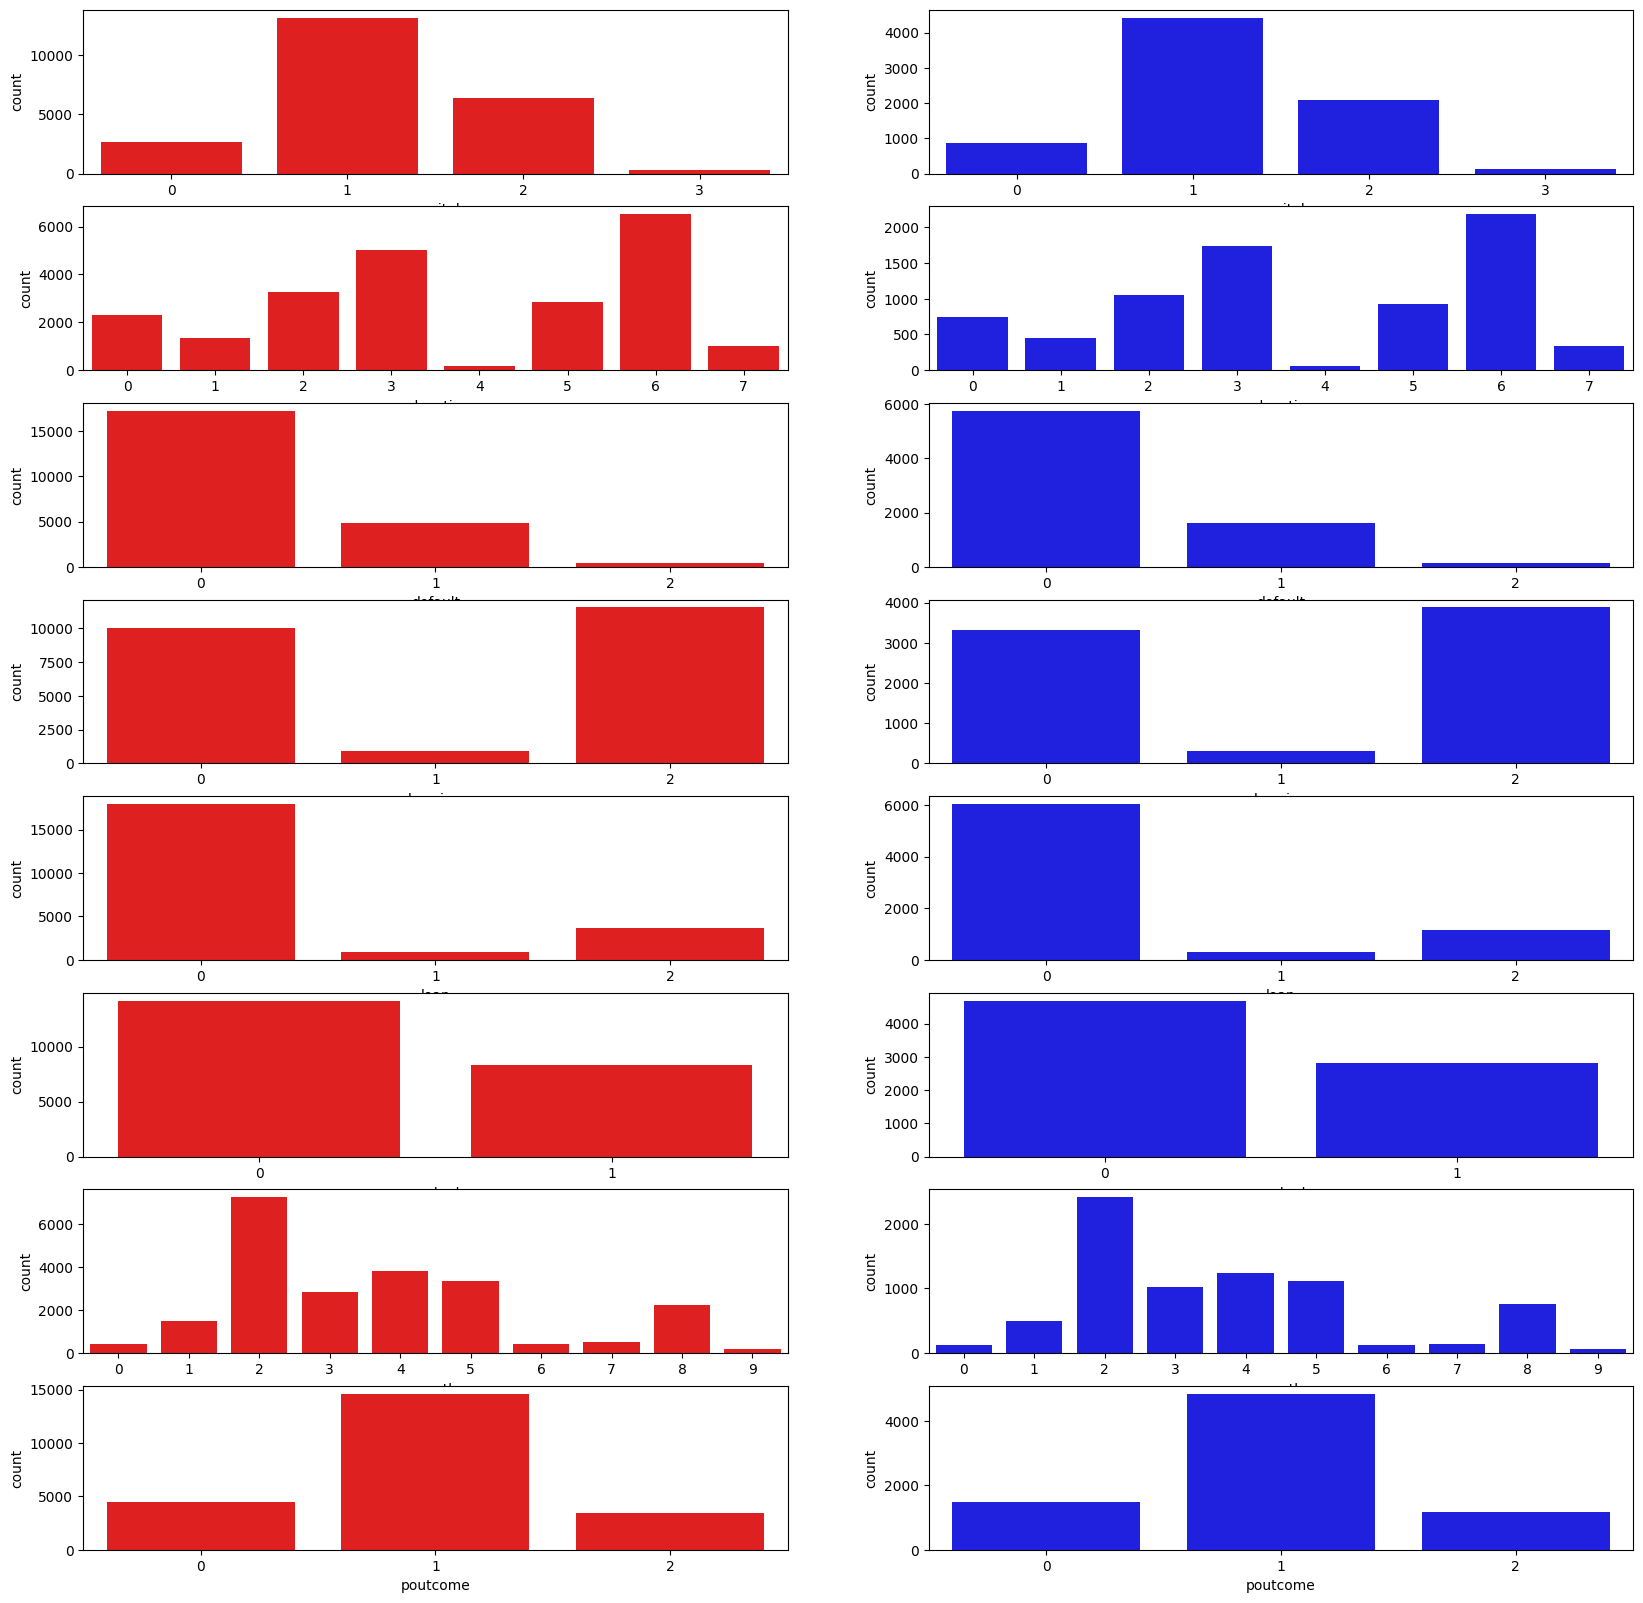

In [12]:
#绘制定性变量除了job外的直方图，观察特征分布
fig=plt.figure(figsize=(20,20))
i=1
for item in labelencoder:
    ax_1=fig.add_subplot(8,2,i)
    sns.countplot(x=item,data=train_df,color='r',ax=ax_1)
    ax_2=fig.add_subplot(8,2,i+1)
    sns.countplot(x=item,data=test_df,color='b',ax=ax_2)
    i+=2
plt.show()


## 定量特征分析

In [13]:
#查看定量特征
train_df[num_feature].head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
0,51,4621,1,112,2,1.4,90.81,-35.53,0.69,5219.74
1,50,4715,1,412,2,-1.8,96.33,-40.58,4.05,4974.79
2,48,171,0,1027,1,-1.8,96.33,-44.74,1.50,5022.61
3,26,359,26,998,0,1.4,97.08,-35.55,5.11,5222.87
4,45,3178,1,240,4,-3.4,89.82,-33.83,1.17,4884.70


In [14]:
#区分连续特征与离散特征
disper=[]
contiuous=[]
for item in num_feature:
    if train_df[item].nunique()<=10:
        disper.append(item)
        continue
    contiuous.append(item)

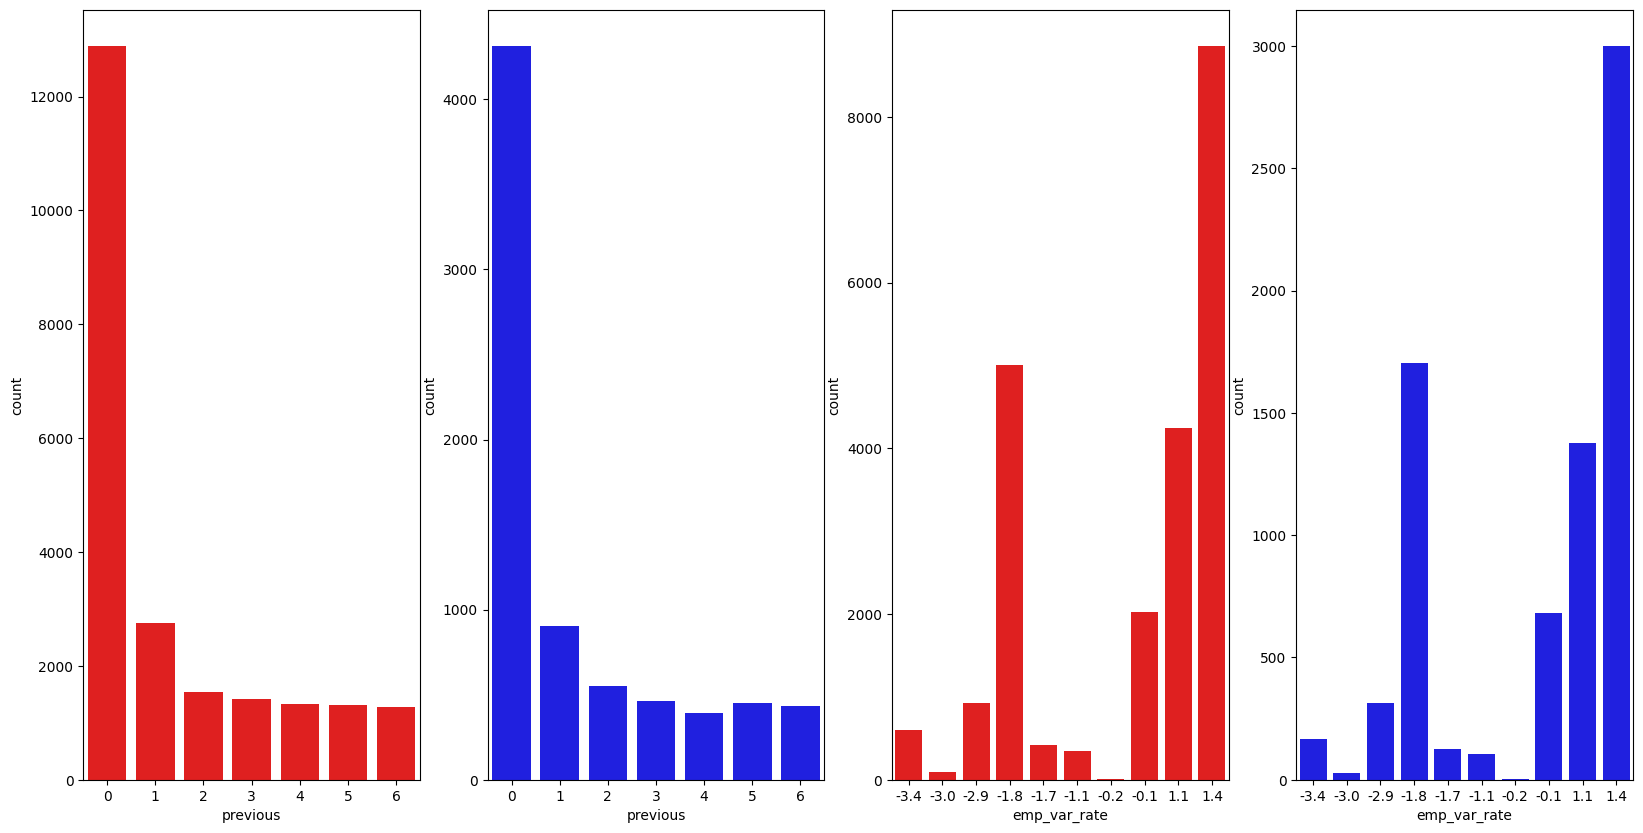

In [15]:
#查看离散特征分布情况
fig=plt.figure(figsize=(20,10))
i=1
for item in disper:
    ax_1=fig.add_subplot(1,4,i)
    ax_2=fig.add_subplot(1,4,i+1)
    sns.countplot(x=item,data=train_df,color='r',ax=ax_1)
    sns.countplot(x=item,data=test_df,color='b',ax=ax_2)
    i+=2
plt.show()


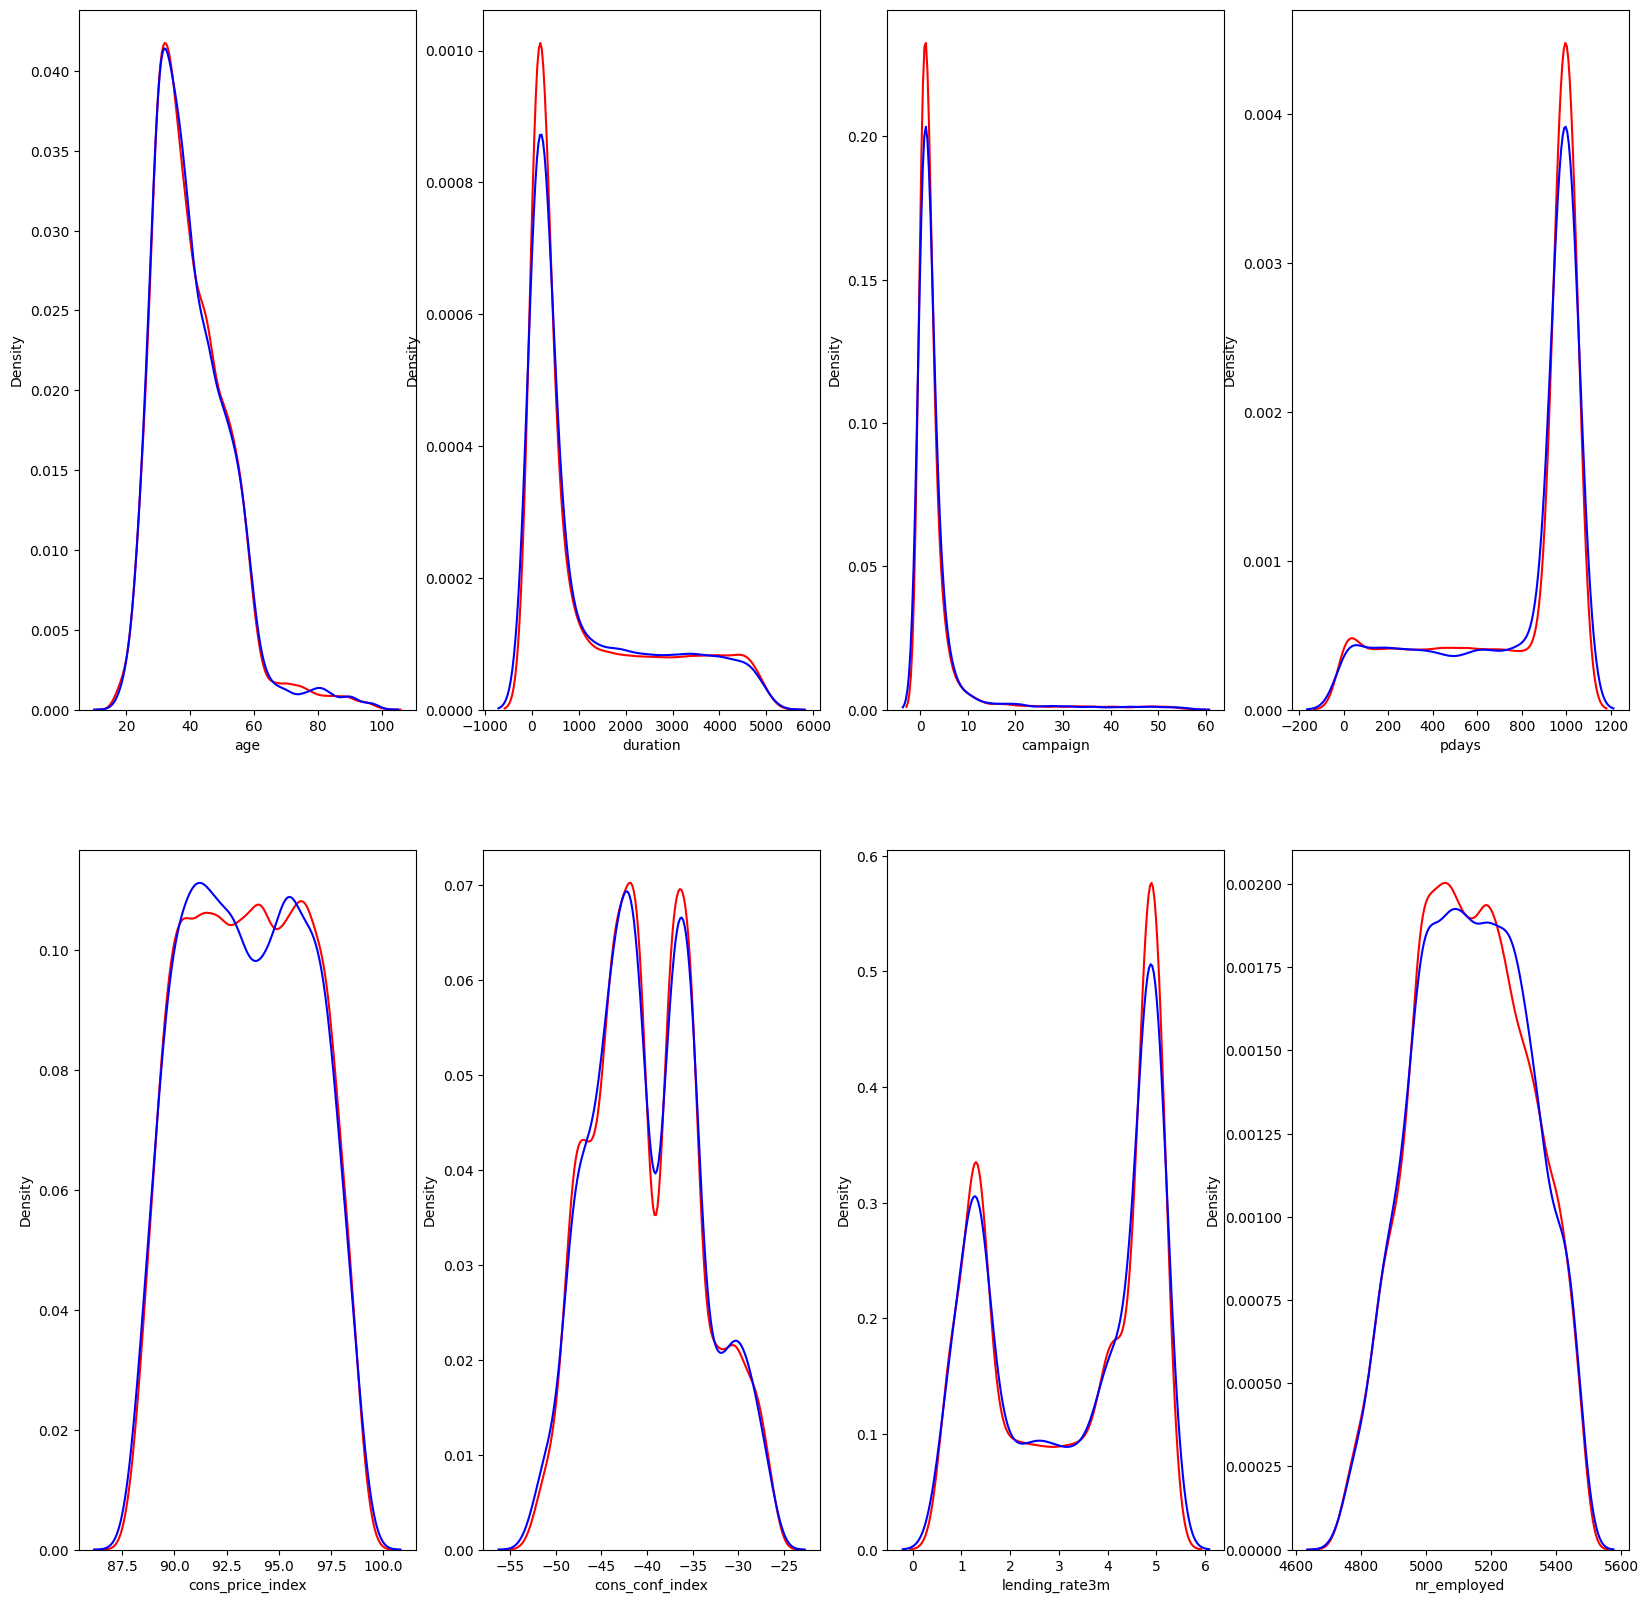

In [16]:
#查看连续特征的分布情况
fig=plt.figure(figsize=(20,20))
i=1
for item in contiuous:
    ax_1=fig.add_subplot(2,4,i)
    sns.kdeplot(train_df[item],color='r',ax=ax_1)
    sns.kdeplot(test_df[item],color='b',ax=ax_1)
    i+=1
plt.show()

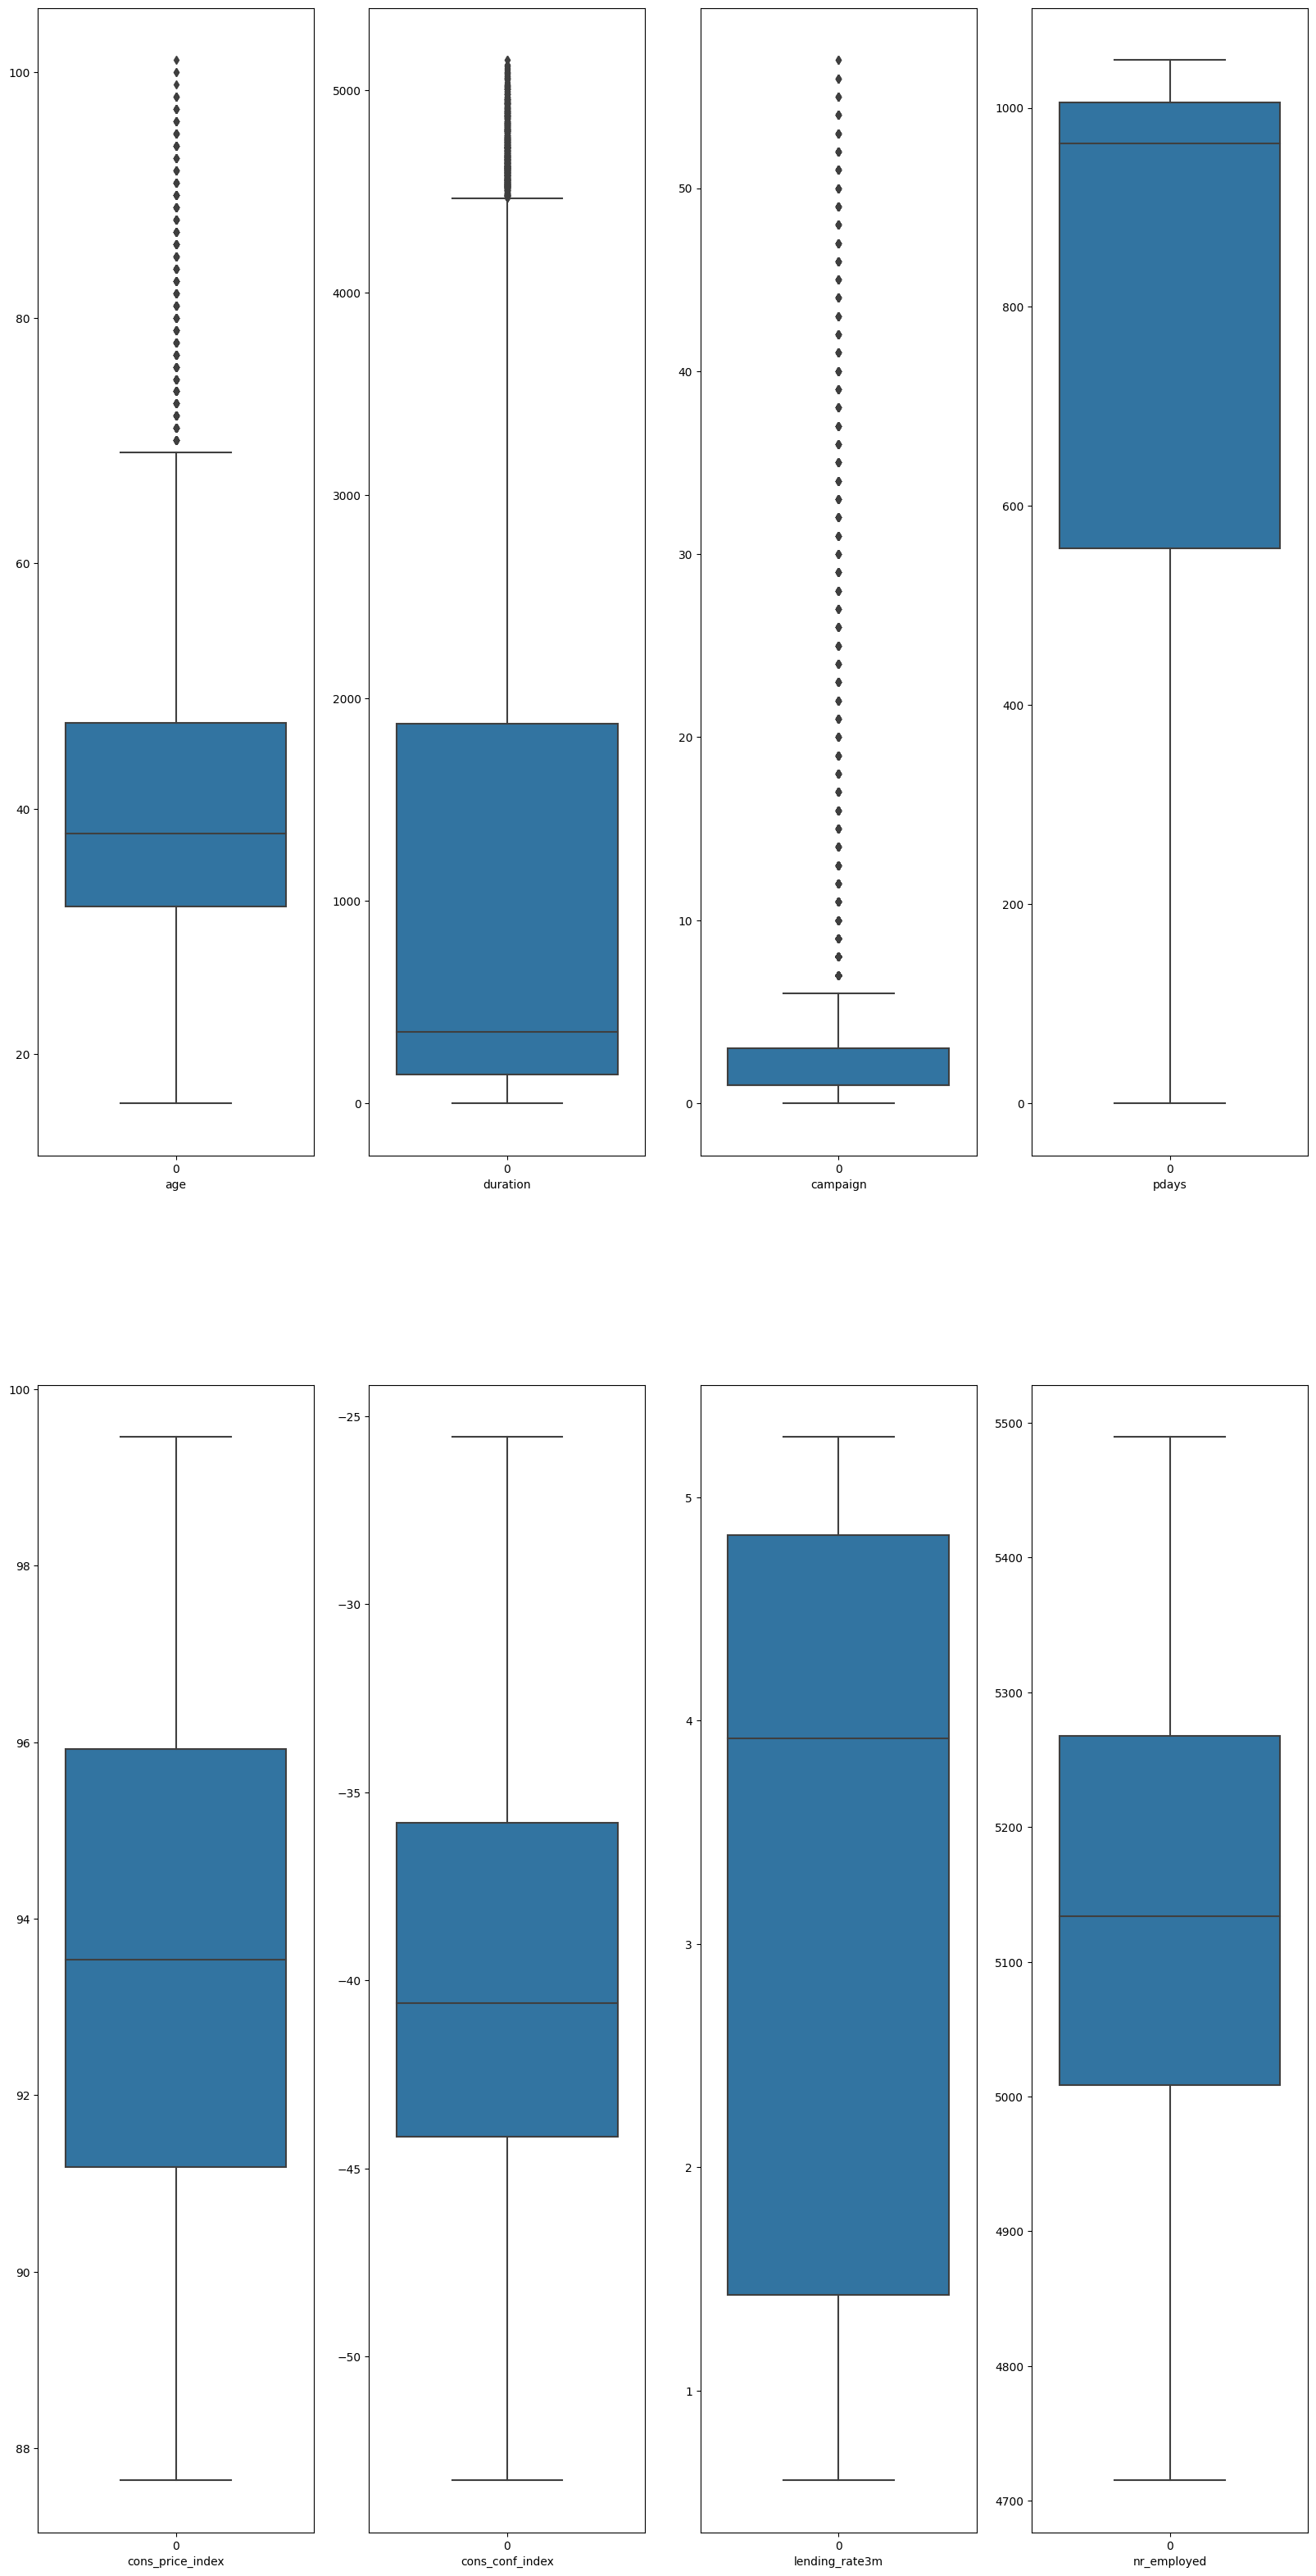

In [17]:
#查看连续特征的异常值
fig=plt.figure(figsize=(20,40))
i=1
outliers_upper=[]
outliers_lower=[]
for item in contiuous:
    ax=fig.add_subplot(2,4,i)
    box=sns.boxplot(train_df[item],ax=ax)
    plt.xlabel(item)
    outliers_upper.append(box.lines[1].get_ydata()[1])
    outliers_lower.append(box.lines[0].get_ydata()[1])
    i+=1
plt.show()

In [18]:
#前三个特征存在异常，需要删除
outliers_fea=contiuous[:3]
for i in range(3):
    item=outliers_fea[i]
    train_df=train_df[train_df[item]<outliers_upper[i]]

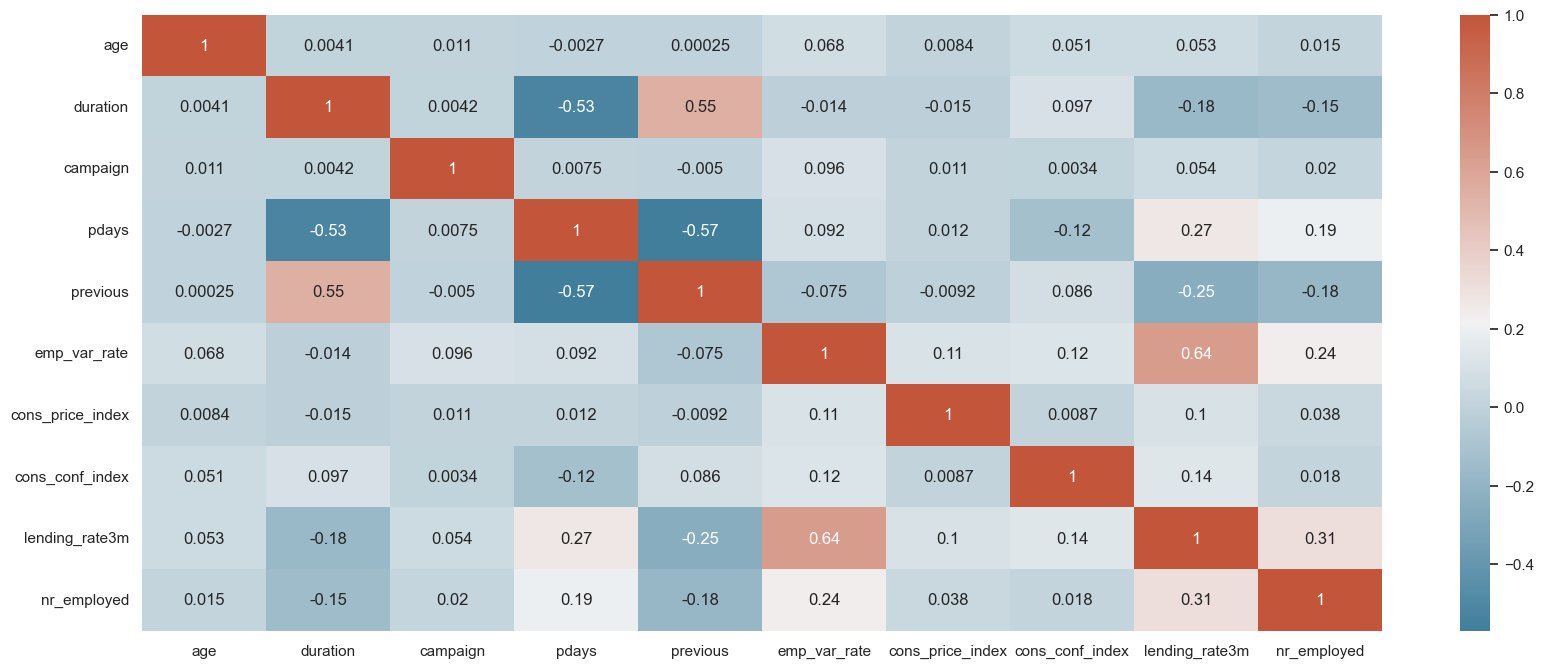

In [19]:
#查看特征与标签的相关性
cor=train_df[num_feature].corr()
fig=plt.figure(figsize=(20,8))
sns.set_theme(style='white')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor,cmap=cmap,annot=True)
plt.show()

# 模型训练

In [20]:
#构建训练集与验证集
from sklearn.model_selection import train_test_split
label=np.array(train_df['subscribe'])
X=np.array(train_df.drop(columns=['subscribe']))
train_x,test_x,train_y,test_y=train_test_split(X,label,test_size=0.3)

In [21]:
#训练初始模型
from xgboost import XGBClassifier
xgbmodel=XGBClassifier(n_estimators=90,max_depth=5)
xgbmodel.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [23]:
#查看模型的表现
from sklearn.metrics import accuracy_score
pred_y_train=xgbmodel.predict(train_x)
pred_y_test=xgbmodel.predict(test_x)
print('训练集准确率：',accuracy_score(y_pred=pred_y_train,y_true=train_y))
print('验证集准确率：',accuracy_score(y_pred=pred_y_test,y_true=test_y))

训练集准确率： 0.9618947209880262
验证集准确率： 0.8966971187631764


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

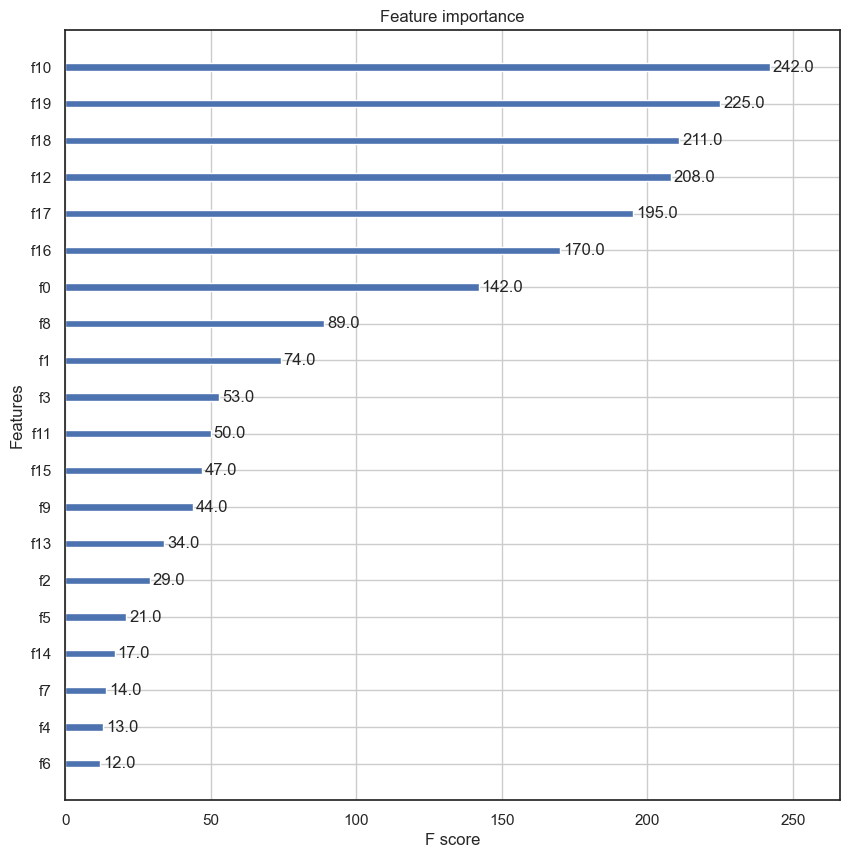

In [32]:
#查看特征重要性
fig=plt.figure(figsize=(10,10))
from xgboost import plot_importance
ax=fig.add_subplot(1,1,1)
plot_importance(xgbmodel,ax=ax)

In [37]:
#在测试集上应用模型
submit=pd.read_csv(path+'submission.csv')
test_data=np.array(test_df)
pred_labels=xgbmodel.predict(test_data)
submit['subscribe']=pred_labels
submit['subscribe']=submit['subscribe'].map({0:'no',1:'yes'})
submit.to_csv(path+'submission.csv',index=False)